In [2]:
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from scipy import stats
import numpy as np
from decimal import Decimal
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
import pandas as pd
from sklearn.preprocessing import normalize
import glob

# Kmin = 1

## Read the simulation biggest component

In [3]:
folder = "/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/"
data = []
for i in range(5):
    filenames = sorted(glob.glob(folder + 'Biggest_component_1E*_'+str(i)+'_1.txt'))
    print(filenames)
    data.append([np.loadtxt(fname=f, delimiter=',') for f in filenames])

['/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E3_0_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E4_0_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E5_0_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E6_0_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E7_0_1.txt']
['/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E3_1_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E4_1_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E5_1_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E6_1_1.txt', '/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component_1E7_1_1.txt']
['/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/Mean/Biggest_component

In [4]:
N = np.array([1e3, 1e4, 1e5, 1e6, 1e7])

In [5]:
c = ['#4DA6FF', '#FFAB2E', '#FF38C3', '#3BFF55', '#7b556c']

In [6]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font1 ={'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }
titles = [r'$k_{min}$ = 1, $\lambda$ = 1.751, $\gamma$ = 2.5', 
          r'$k_{min}$ = 1, $\lambda$ = 0.551, $\gamma$ = 3.0',
          r'$k_{min}$ = 1, $\lambda$ = 0.334, $\gamma$ = 3.5',
          r'$k_{min}$ = 1, $\lambda$ = 0.26, $\gamma$ = 4.0',
          r'$k_{min}$ = 1, $\lambda$ = 0.223, $\gamma$ = 4.5']

In [7]:
def plot_Tm_p(i):
    fig, axs = plt.subplots(figsize=(15, 7))
    j = 0
    for d in data[i]:
        axs.scatter(1-d[:-1].T[0], d[:-1].T[1], color="gray", facecolors=c[4 - j], label=r'N = %.0f' %N[j], alpha=0.45)
        axs.legend(loc='lower left', shadow=True, fontsize='x-large')
        plt.ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
        plt.xlabel('$1 - p$', font)
        plt.xlim(0.1,1)
        plt.xscale('log')
        j += 1
        plt.title(titles[i], fontdict=font)

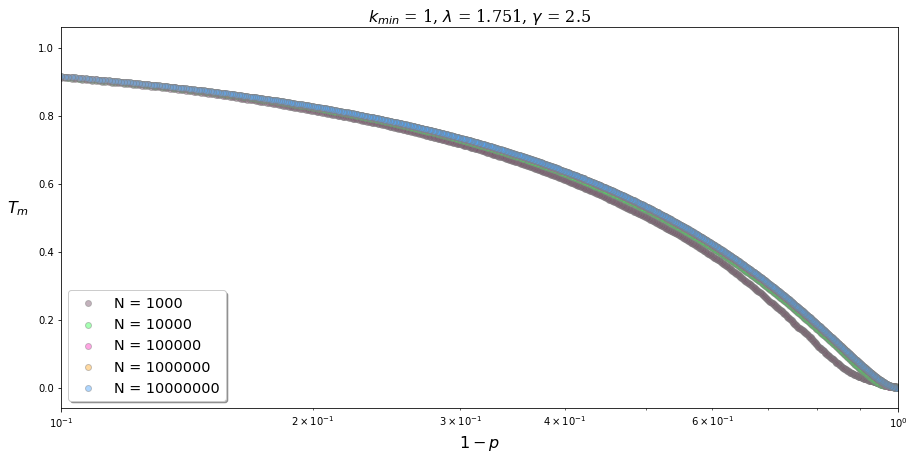

In [8]:
plot_Tm_p(0)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_0_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

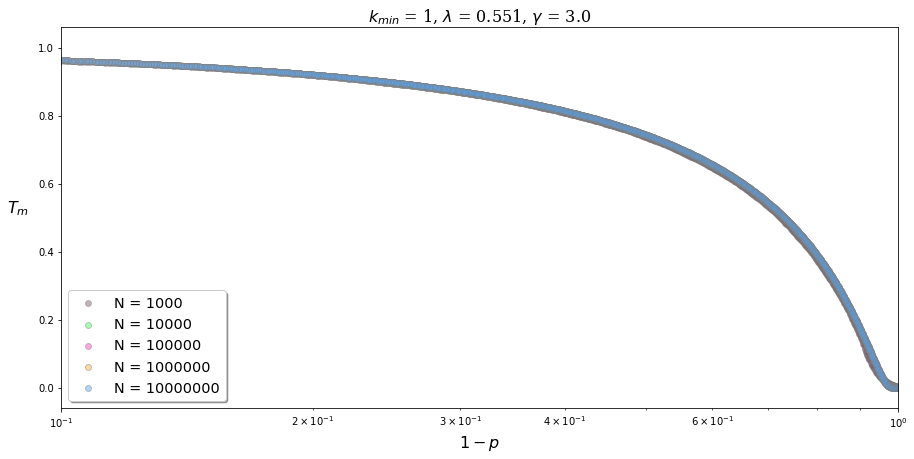

In [9]:
plot_Tm_p(1)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_1_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

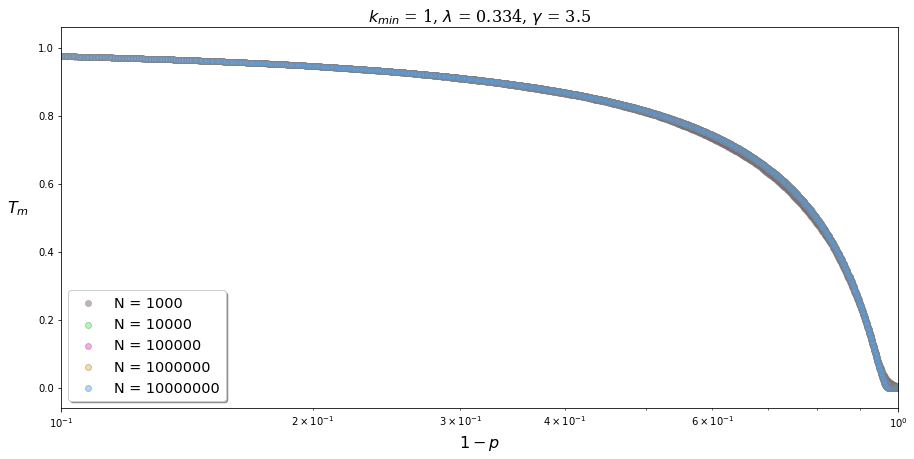

In [10]:
plot_Tm_p(2)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_2_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

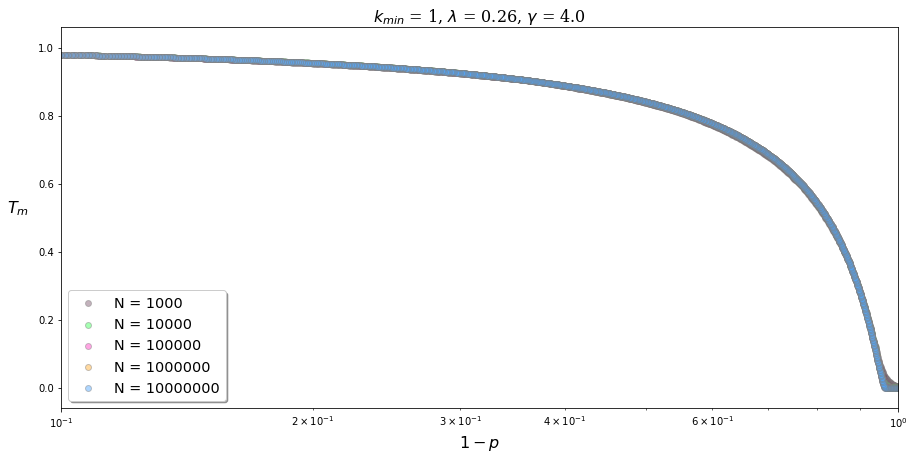

In [11]:
plot_Tm_p(3)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_3_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

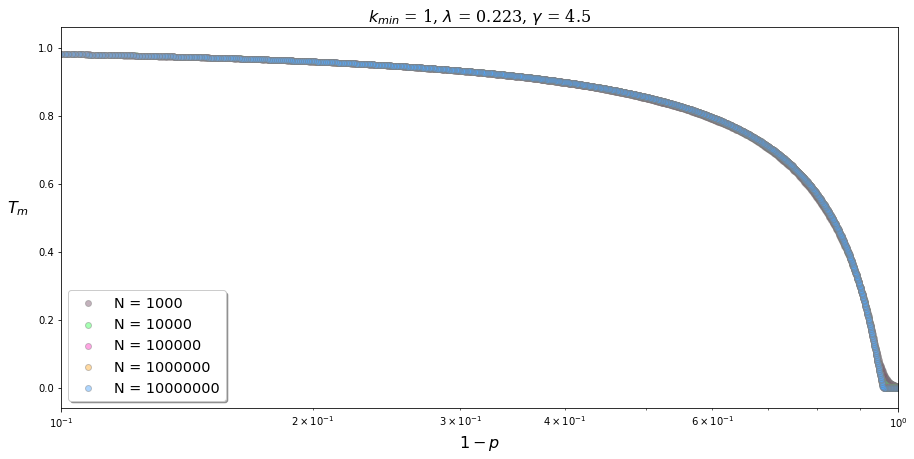

In [12]:
plot_Tm_p(4)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_4_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [13]:
def plot_graph(data):
    fig, axs = plt.subplots(figsize=(15, 7))
    i = 0
    for datum in data:
        axs.plot(1 - datum[4].T[0][:-1], datum[4].T[1][:-1], color=c[i], label=titles[i], lw=1, alpha=0.8)
        for d in datum:
            axs.plot(1 - d.T[0][:-1], d.T[1][:-1], color=c[i], lw=1, alpha=0.8)
        i += 1
    plt.ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
    plt.xlabel('$1 - p$', font)
    plt.xlim(0.1,1)
    plt.xscale('log')
#     plt.yscale('log')
    axs.legend(loc='lower left', shadow=True, fontsize='x-large')
    plt.title( 'Overlaped curves', fontdict=font)

In [14]:
def plot_Tm_p_all():
    fig = plt.figure(figsize=(15, 14))
    fig.tight_layout()
    for i in range(5):
        j = 0
        for d in data[i]:
            ax = fig.add_subplot(5, 1, i + 1)
            ax.scatter(1-d[:-1].T[0], d[:-1].T[1], color="gray", facecolors=c[4 - j], label=r'N = %.0f' %N[j], alpha=0.45)
            ax.legend(loc='lower left', shadow=True, fontsize='x-large')

            ax.set_xticks([])
            if(i == 2):
                ax.set_ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
            plt.xlim(0.07,1)
            plt.subplots_adjust(hspace = .001)
            plt.xscale('log')
            j += 1
            plt.text(0.25, 0.0, titles[i], fontdict=font)
    plt.xlabel('$1 - p$', font)

/home/marcio/Projects/Random-Graph/RandomGraph_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


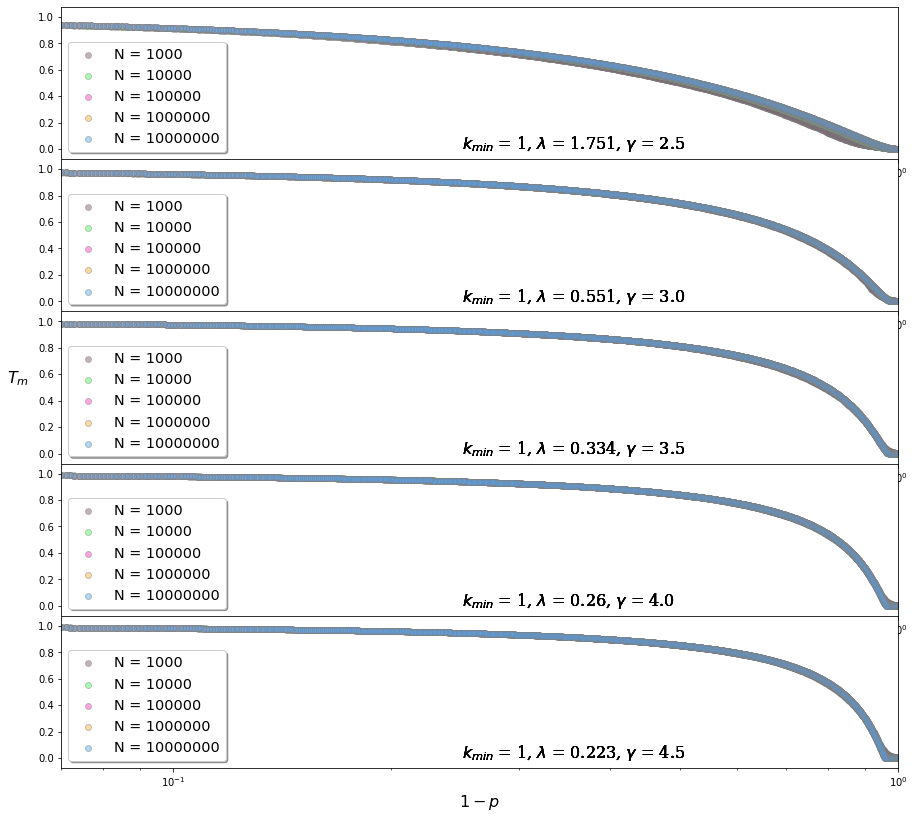

In [15]:
plot_Tm_p_all()
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_all.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

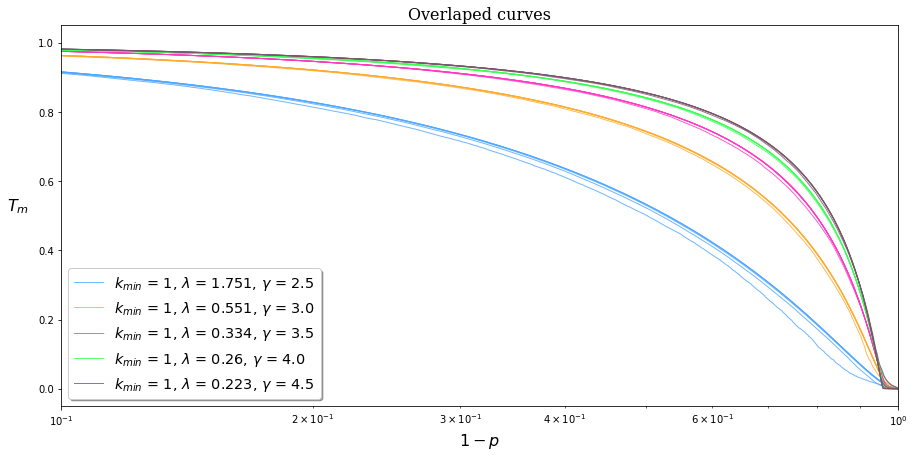

In [15]:
plot_graph(data)
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/percolac_log_all_overlap.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [19]:
def dfdx3p(i, h, n, y):
    return (1 / (2 * h * n)) * (y[i + n] - y[i - n])

def dfdx5p(i, h , n, y):
    h = n * h
    return (1 / (12 * h)) * (y[i - (2 * n)] - 8 * y[i - (n)] + 8 * y[i + (n)] - y[i + (2 * n)])

def d1(h, y, i):
    return (1 / (2 * h)) * (y[i + 1] - y[i - 1])

def d2(h, y, i):
    return (1 / (h * h)) * (y[i - 1] - 2 * y[i] + y[i + 1])

In [22]:
from scipy.signal import savgol_filter

In [23]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [89]:
def plot_dTm_p_all():
    fig = plt.figure(figsize=(15, 14))
    fig.tight_layout()
    for i in range(5):
        j = 0
        for d in data[i]:
            x = d.T[0][2:-1]
            y = d1(d.T[0][1], d.T[1][:-1], np.array(range(1, len(d.T[0][:-1]) - 1)))
            if(i == 0):
                yhat = lowess(y, x, frac=1/15).T[1]
            else:
                yhat = savgol_filter(y, 51, 2) # window size 51, polynomial order 2
            ax = fig.add_subplot(5, 1, i + 1)
            ax.plot(x, yhat, color=c[4 - j], label=r'N = %.0f' %N[j], alpha=0.7)
            ax.set_xticks([])
            if(i == 2):
                ax.set_ylabel(r'$\frac{d^2T_m}{dp^2}$', rotation=0, labelpad=20, fontdict=font)
            plt.xlim(0,1)
            plt.subplots_adjust(hspace = .001)
#             plt.xscale('log')
            j += 1
            if(i == 0):
                plt.text(0.415, 0.6, titles[i], fontdict=font)
            else:
                plt.text(0.415, 2.5, titles[i], fontdict=font)
            
    plt.legend(loc='upper right', shadow=False, fontsize='x-large', fancybox=True, framealpha=0.50)
    
    plt.xlabel('$p$', font)
    plt.xticks([0, 0.25, 0.5, 0.75, 1])

/home/marcio/Projects/Random-Graph/RandomGraph_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


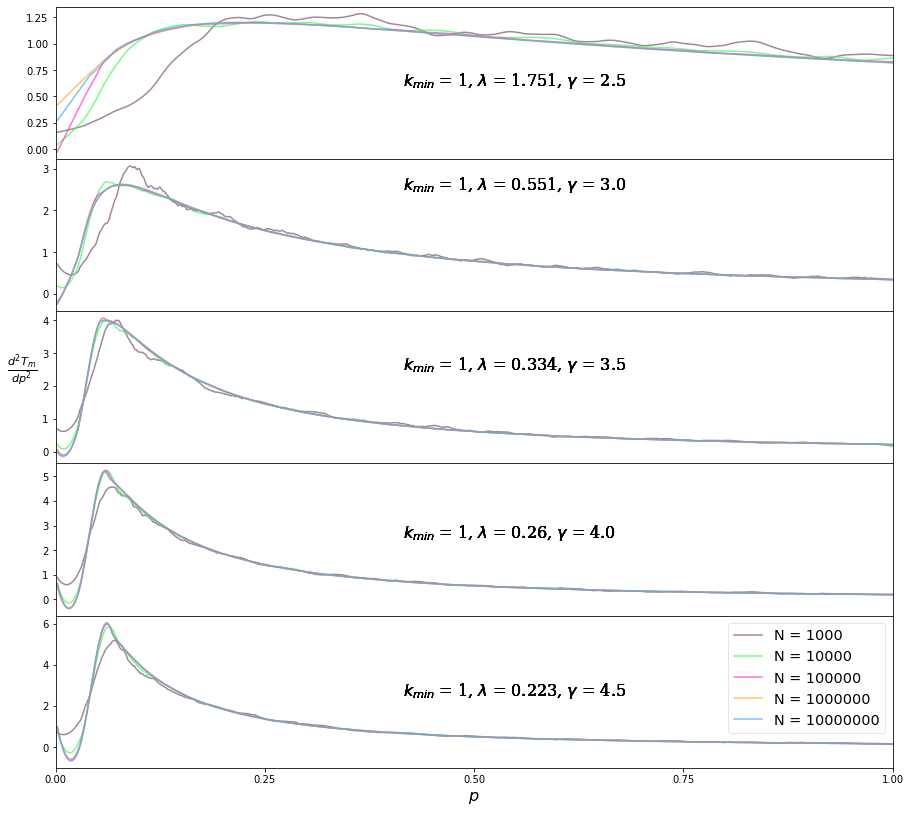

In [90]:
plot_dTm_p_all()
plt.savefig("/home/marcio/pCloudDrive/Physics/Thesis/Andre/Results/JPG/dTm_all_overlap.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [102]:
results = []
for i in range(5):
    j = 0
    result_per_param = []
    for d in data[i]:
        x = d.T[0][2:-1]
        y = d1(d.T[0][1], d.T[1][:-1], np.array(range(1, len(d.T[0][:-1]) - 1)))
        if(i == 0):
            yhat = lowess(y, x, frac=1/15).T[1]
        else:
            yhat = savgol_filter(y, 51, 2) # window size 51, polynomial order 2
        k = np.where(yhat == np.amax(yhat))[0]
        result_per_param.append(x[k][0])
        j += 1
    results.append(result_per_param)

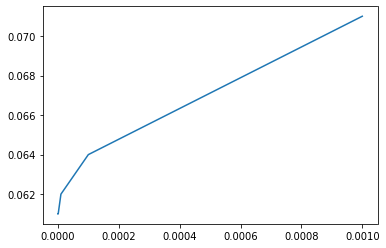

In [148]:
plt.plot(1/N, results[4])

In [ ]:
    fig = plt.figure(figsize=(15, 14))
    fig.tight_layout()
    for i in range(2):
        ax = fig.add_subplot(5, 1, i + 1)
        ax.plot(1/N, results[4], alpha=0.7)
        ax.set_xticks([])
#         if(i == 2):
#             ax.set_ylabel(r'$\frac{d^2T_m}{dp^2}$', rotation=0, labelpad=20, fontdict=font)
#         plt.xlim(0,0.2)
        plt.subplots_adjust(hspace = .001)
        plt.xscale('log')
        plt.yscale('log')
            
    plt.legend(loc='upper right', shadow=False, fontsize='x-large', fancybox=True, framealpha=0.50)
    
    plt.xlabel('$p$', font)
    plt.xticks([0, 0.25, 0.5, 0.75, 1])

In [158]:
def plot_pc_all(results):
    fig = plt.figure(figsize=(15, 14))
    fig.tight_layout()
    for i in range(2):
        ax = fig.add_subplot(5, 1, i + 1)
        ax.plot(1/N, results[4], alpha=0.7)
        ax.set_xticks([])
#         if(i == 2):
#             ax.set_ylabel(r'$\frac{d^2T_m}{dp^2}$', rotation=0, labelpad=20, fontdict=font)
#         plt.xlim(0,0.2)
        plt.subplots_adjust(hspace = .001)
        plt.xscale('log')
        plt.yscale('log')
            
    plt.legend(loc='upper right', shadow=False, fontsize='x-large', fancybox=True, framealpha=0.50)
    
    plt.xlabel('$p$', font)
    plt.xticks([0, 0.25, 0.5, 0.75, 1])

No handles with labels found to put in legend.


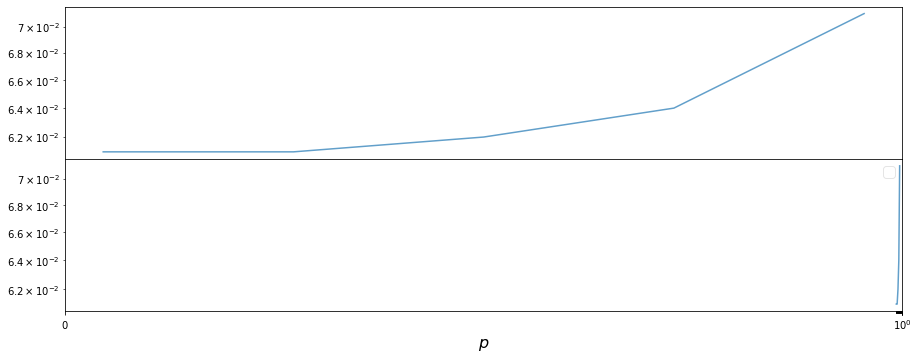

In [159]:
plot_pc_all(results)

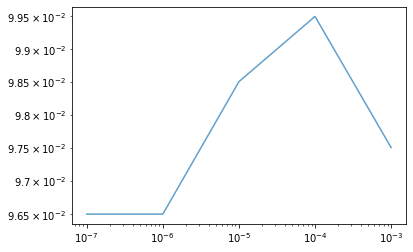

In [26]:
pc = []
for k in range(5):
    d = data[3][k]
    x = d.T[0][2:-1]
    y = d2(d.T[0][1], d.T[1][:-1], np.array(range(1, len(d.T[0][:-1]) - 1)))
    yhat = savgol_filter(y, 115, 1)
#     plt.figure(figsize=(15, 14))
#     plt.plot(x, yhat, alpha=0.7)


    for i in range(len(y)):
        if (yhat[i] >=0 and yhat[i + 1] < 0):
            pc.append((x[i] + x[i+1]) / 2)
            break
plt.plot(1/N, pc, alpha=0.7)
plt.xscale('log')
plt.yscale('log')